In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/ipl (2).csv')

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.shape

(8664, 15)

In [ ]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs              float64
wickets           float64
overs             float64
runs_last_5       float64
wickets_last_5    float64
striker           float64
non-striker       float64
total             float64
dtype: object

In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (8664, 15)
After removing unwanted columns: (8664, 9)


In [ ]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


In [ ]:
df.index

RangeIndex(start=0, stop=8664, step=1)

In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (8664, 9)
After removing inconsistent teams: (6441, 9)


In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils'], dtype=object)

In [ ]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (6441, 9)
After removing first 5 overs data: (4775, 9)


In [ ]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


<ipython-input-132-9a4b3cb86c7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


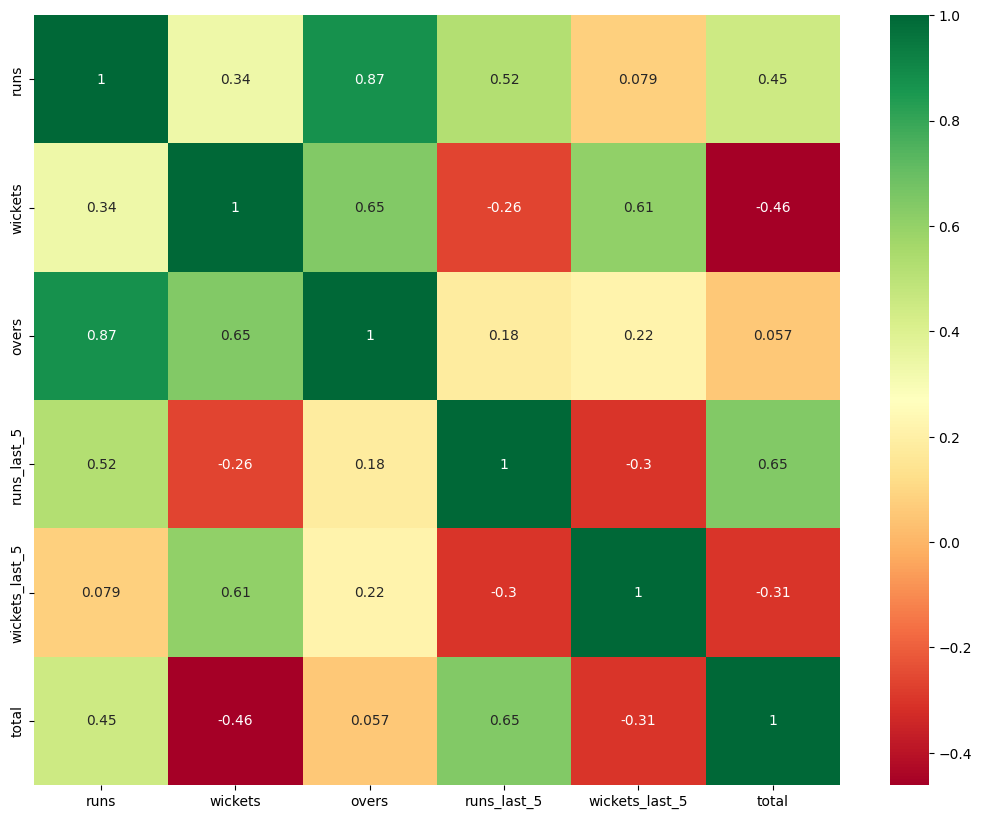

In [ ]:

# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas.util.testing as tm
# Get correlation of all the features of the dataset


numerical_cols = df.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

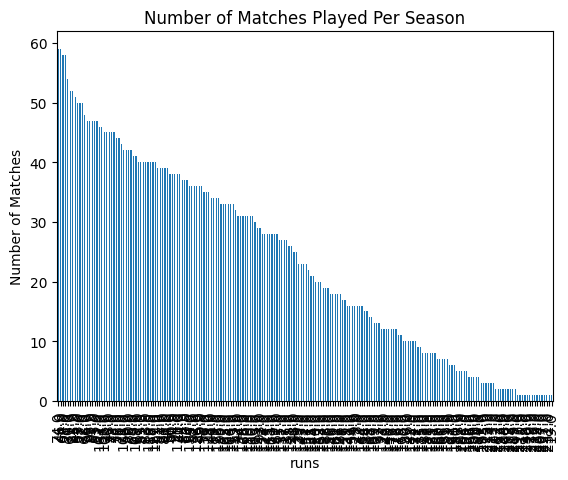

In [ ]:
df["runs"].value_counts().plot(kind="bar")
plt.title("Number of Matches Played Per Season")
plt.xlabel("runs")
plt.ylabel("Number of Matches")
plt.show()

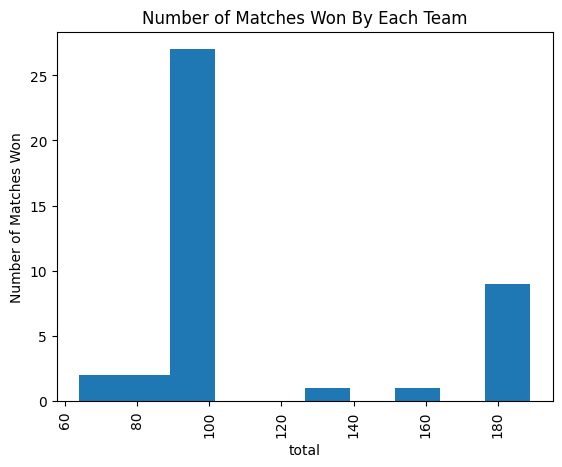

In [ ]:
df["total"].value_counts().plot(kind="hist")
plt.title("Number of Matches Won By Each Team")
plt.xlabel("total")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore'],
      dtype='object')

In [ ]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,2008-04-18,61.0,0.0,5.1,59.0,0.0,222.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
33,2008-04-18,61.0,1.0,5.2,59.0,1.0,222.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
34,2008-04-18,61.0,1.0,5.3,59.0,1.0,222.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
35,2008-04-18,61.0,1.0,5.4,59.0,1.0,222.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
36,2008-04-18,61.0,1.0,5.5,58.0,1.0,222.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dropped_columns = ['bat_team_Sunrisers Hyderabad', 'bowl_team_Sunrisers Hyderabad']

for col in dropped_columns:
    if col not in encoded_df.columns:
        print(f"Column '{col}' was dropped.")


Column 'bat_team_Sunrisers Hyderabad' was dropped.
Column 'bowl_team_Sunrisers Hyderabad' was dropped.


In [ ]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [ ]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,True,5.1,61.0,0.0,59.0,0.0,222.0
33,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,True,5.2,61.0,1.0,59.0,1.0,222.0
34,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,True,5.3,61.0,1.0,59.0,1.0,222.0
35,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,True,5.4,61.0,1.0,59.0,1.0,222.0
36,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,False,True,5.5,61.0,1.0,58.0,1.0,222.0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test set
X = encoded_df.drop(labels='total', axis=1)
y = encoded_df['total']

# Encoding year into a binary variable
X['year'] = (X['date'].dt.year <= 2016).astype(int)

# Removing the 'date' column
X.drop(labels='date', axis=True, inplace=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X['year'], random_state=42)

# Dropping the 'year' column
X_train.drop(labels='year', axis=True, inplace=True)
X_test.drop(labels='year', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))


Training set: (3342, 19) and Test set: (1433, 19)


In [ ]:
X_test

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,overs,runs,wickets,runs_last_5,wickets_last_5
2425,True,False,False,False,False,False,False,False,True,False,False,False,False,False,11.4,103.0,2.0,50.0,1.0
4943,False,False,False,False,False,True,False,False,False,False,False,False,False,True,9.3,91.0,0.0,48.0,0.0
5489,False,False,True,False,False,False,False,False,False,False,False,True,False,False,17.2,149.0,3.0,37.0,2.0
1823,True,False,False,False,False,False,False,False,False,False,False,False,False,True,14.6,102.0,3.0,37.0,1.0
2065,False,True,False,False,False,False,False,False,False,False,False,False,False,True,14.1,139.0,1.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,False,False,False,False,False,False,True,True,False,False,False,False,False,False,12.2,56.0,4.0,26.0,2.0
3289,False,False,False,False,False,True,False,False,False,False,False,True,False,False,12.1,86.0,5.0,25.0,3.0
466,False,False,False,False,True,False,False,False,False,False,False,False,False,True,15.4,110.0,4.0,29.0,1.0
5250,False,False,False,False,False,False,True,False,True,False,False,False,False,False,18.2,125.0,6.0,34.0,3.0


### *Linear Regression*

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [ ]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
print("R2 Score: {}".format(r2_score(y_test, y_pred_lr)))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.075692762914619
Mean Squared Error (MSE): 260.2611337613708
Root Mean Squared Error (RMSE): 16.132610878632473
R2 Score: 0.7454760116930301


### *Decision Tree*

In [ ]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [ ]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_dt))))
print("R2 Score: {}".format(r2_score(y_test, y_pred_dt)))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.407536636427076
Mean Squared Error (MSE): 59.24284717376134
Root Mean Squared Error (RMSE): 7.696937519154052
R2 Score: 0.9420630905452387


### *Random Forest*

In [ ]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print("R2 Score: {}".format(r2_score(y_test, y_pred_rf)))


---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.7358199581297977
Mean Squared Error (MSE): 15.542226168876477
Root Mean Squared Error (RMSE): 3.9423630184036167
R2 Score: 0.9848003836204815
